**Rozwiązywanie równań nieliniowych**

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
from scipy.misc import derivative as deriv

**Zadanie 1.**

In [3]:
# Data
f_1 = lambda x: x**3-5*x
x0_1 = 1.0
f_2 = lambda x: x**3-3*x+1
x0_2 = 1.0
f_3 = lambda x: 2-x**5
x0_3 = 0.01
f_4 = lambda x: x**4-4.29*x**2-5.29
x0_4 = 0.8

# Initial found roots
root_f_1 = scipy.optimize.newton(f_1, x0_1)
root_f_2 = scipy.optimize.newton(f_2, x0_2)
root_f_3 = scipy.optimize.newton(f_3, x0_3)
root_f_4 = scipy.optimize.newton(f_4, x0_4)
print(root_f_1, root_f_2,root_f_3,root_f_4)

# Correct roots
x0_1 = 2
root_f_1 = scipy.optimize.newton(f_1, x0_1, maxiter=100)
x0_2 = 1.5
root_f_2 = scipy.optimize.newton(f_2, x0_2, maxiter=100)
x0_3 = 1.1
root_f_3 = scipy.optimize.newton(f_3, x0_3, maxiter=100)
x0_4 = 2.0
root_f_4 = scipy.optimize.newton(f_4, x0_4, maxiter=100)
print(root_f_1, root_f_2,root_f_3,root_f_4)

4.744493466790075e-24 1.0000007188230098 0.01 -0.7870232540616441
2.236067977499789 1.532088886237956 1.1486983549970238 2.3


**Zadanie 2.**

[1.33333333 0.82287566 0.66666667 0.66666667]


/tmp/ipykernel_10973/3391297396.py:13: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  g_conv_rate = np.abs([deriv(g_1, x0), deriv(g_2, x0),
/tmp/ipykernel_10973/3391297396.py:14: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  deriv(g_3, x0), deriv(g_4, x0)])


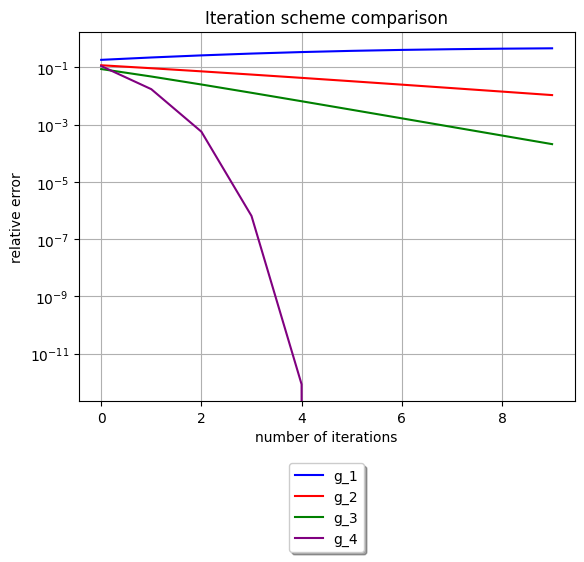

In [4]:
# Data
f = lambda x: x**2-3*x+2
g_1 = lambda x: (x**2+2)/3
g_2 = lambda x: np.sqrt(3*x-2)
g_3 = lambda x: 3 -  2/x
g_4 = lambda x: (x**2 - 2)/(2*x-3)

x0 = 2.0
init = 1.7
n = 10
n_range = np.array(range(0,n))

g_conv_rate = np.abs([deriv(g_1, x0), deriv(g_2, x0),
                deriv(g_3, x0), deriv(g_4, x0)])
print(g_conv_rate)

def iterate(f, init, x0, n):
    x = init
    errors = []
    for _ in range(n):
        x = f(x)
        error = np.abs(x - x0)
        errors.append(error)
    return np.array(errors)

errors_g_1 = iterate(g_1, init, x0, n)
errors_g_2 = iterate(g_2, init, x0, n)
errors_g_3 = iterate(g_3, init, x0, n)
errors_g_4 = iterate(g_4, init, x0, n)

# Plot
plt.title("Iteration scheme comparison")
plt.plot(n_range, errors_g_1/x0, color='blue', label='g_1')
plt.plot(n_range, errors_g_2/x0, color='red', label='g_2')
plt.plot(n_range, errors_g_3/x0, color='green', label='g_3')
plt.plot(n_range, errors_g_4/x0, color='purple', label='g_4')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.ylabel('relative error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

0.7136419699591807 1.0063420698282552 1.0006033988103809 1.9996682640830932


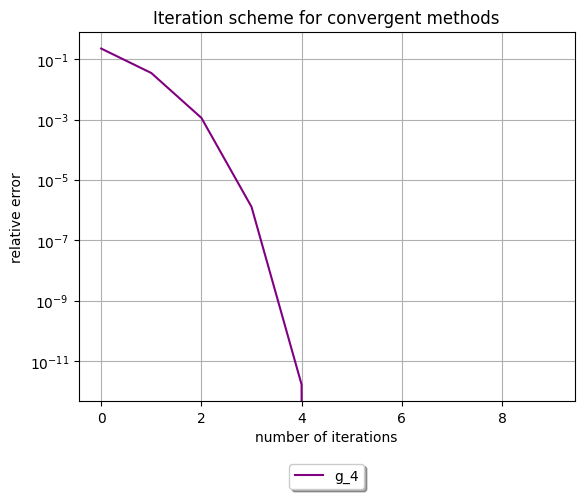

In [5]:
R = lambda eps, k: np.log(eps[k]/eps[k+1])/np.log(eps[k-1]/eps[k])

r_1 = R(errors_g_1,8)
r_2 = R(errors_g_2,8)
r_3 = R(errors_g_3,8)
r_4 = R(errors_g_4,3)

print(r_1, r_2, r_3, r_4)

# Plot
plt.title("Iteration scheme for convergent methods")
plt.plot(n_range, errors_g_4, color='purple', label='g_4')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.ylabel('relative error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

**Zadanie 3.**

/tmp/ipykernel_10973/2158227090.py:22: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  x = x - f(x)/deriv(f,x)


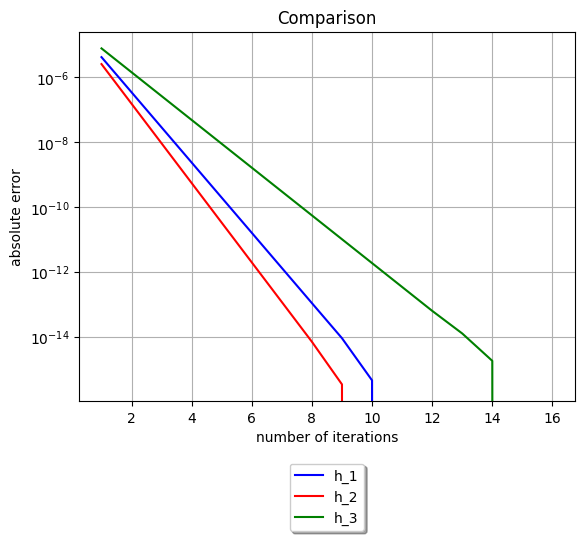

In [6]:
# Data
h_1 = lambda x: x**3-2*x-5
h_2 = lambda x: np.exp(-x) - x
h_3 = lambda x: x*np.sin(x) - 1

x0_1 = 2.0945
x0_2 = 0.5671
x0_3 = 9.3172

true_value_1 = 2.09455148154232659148238654057930296385730610562823918
true_value_2 = 0.56714329040978387299996866221035554975381578718651250
true_value_3 = 9.31724294141480961860128851356951156244980218237363582

n = 16
n_range = np.array(range(0,n))

# Newton-Raphson's method
def newton(f, x0, true_value, n):
    x = x0
    errors = []
    for _ in range(n):
        x = x - f(x)/deriv(f,x)
        error = np.abs(x - true_value)
        errors.append(error)
    return np.array(errors)

errors_h_1 = newton(h_1, x0_1, true_value_1, n)
errors_h_2 = newton(h_2, x0_2, true_value_2, n)
errors_h_3 = newton(h_3, x0_3, true_value_3, n)

# Plot
plt.title("Comparison")
plt.plot(n_range+1, errors_h_1, color='blue', label='h_1')
plt.plot(n_range+1, errors_h_2, color='red', label='h_2')
plt.plot(n_range+1, errors_h_3, color='green', label='h_3')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.ylabel('absolute error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()

# Answer: 24-bit: 3 (error<10^{-7}), 53-bit: 10, 8, 14 (error<10^{-15})

**Zadanie 4.**

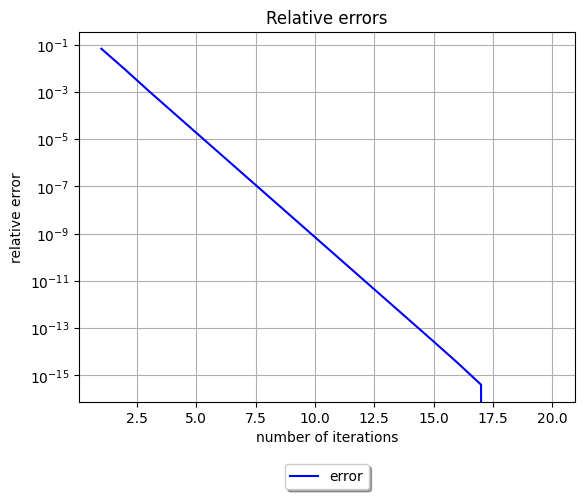

In [7]:
# Data
f_1 = lambda x, y: x**2 + y**2 - 1
f_2 = lambda x, y: x**2 - y

x0 = [1.0, 1.0]

true_value = (np.sqrt(np.sqrt(5)/2 - 0.5), np.sqrt(5)/2 - 0.5)
true_value_norm = np.sqrt(true_value[0]**2 + true_value[1]**2)

n = 20
n_range = np.array(range(0,n))

df_1_x = lambda x, _: 2*x
df_1_y = lambda y, _: 2*y
df_2_x = lambda x, _: 2*x
df_2_y = lambda _, __: -1

# Newton-Raphson's method for 2 variable functions
def newton_eq(f, g, df, dg, x0, true_value, n):
    x = np.array(x0)
    errors = []
    for _ in range(n):
        D = np.array([[df[0](x[0], x[1]), df[1](x[0], x[1])], 
        [dg[0](x[0], x[1]), dg[1](x[0], x[1])]])
        F = np.array([f(x[0], x[1]), g(x[0], x[1])])
        # X = D^{-1} @ F
        # D @ X = F
        X = scipy.linalg.solve(D, F) 
        x = x - X
        error = np.sqrt((x[0] - true_value[0])**2 + (x[1] - true_value[1])**2)
        errors.append(error)
    return np.array(errors)


errors = newton_eq(f_1, f_2, [df_1_x, df_1_y], [df_2_x, df_2_y],
                    x0, true_value, n)


# Plot
plt.title("Relative errors")
plt.plot(n_range+1, errors/true_value_norm, color='blue', label='error')
plt.yscale('log')
plt.xlabel('number of iterations')
plt.ylabel('relative error')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15),
        fancybox=True, shadow=True, ncol=1)
plt.grid()
plt.show()
